In [1]:
import numpy as np
import sympy as s
import pandas as pd
import matplotlib.pyplot as plt
from reader import llegeix_dades
from exporter import exporta
from ebola_313 import ebola3
from distancia import distancia as d
import random as rnd

In [2]:
dades = llegeix_dades()
d1 = dades['1C']

In [62]:
x0 = d1["x"][0]
y0 = d1["y"][0]
vx0 = d1["vx"][0]
vy0 = d1["vy"][0]

def fitness(v):
    [c,k,sigma,mu,rnu,ws] = v
    return d(ebola3(c, k, sigma, mu, rnu, ws, len(d1), 1/180, x0, y0, vx0, vy0, 1),d1)[2]


In [63]:
#res = minimize(fitness, [1.5,0.2,1.3,0.002,0.5,2] , method='nelder-mead',options={'xtol': 1e-8, 'disp': True})
xinicial = [1.5,0.2,1.3,0.002,0.5,2]

In [64]:
from scipy.optimize import fmin_powell

In [65]:
fitness(xinicial)

0.071833661168022117

In [66]:
fmin_powell(fitness, xinicial, xtol=0.0001, ftol=0.0001, maxiter=1, maxfun=None, full_output=1, disp=1, retall=1)

(array([ 1.68129612,  0.20020785,  1.33923364,  0.00434235,  1.5       ,
         1.99934928]),
 0.043513639058547625,
 array([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]]),
 1,
 118,
 2,
 [array([ 1.5  ,  0.2  ,  1.3  ,  0.002,  0.5  ,  2.   ]),
  array([ 1.68129612,  0.20020785,  1.33923364,  0.00434235,  1.5       ,
          1.99934928])])

In [48]:
fitness([ 1.47174765,  0.20039602,  1.19896488,  0.03158433,  0.49511289, -1.3445279])

0.00048134422233207693

In [67]:
def fer_el_plot(c, k, sigma, mu, rnu, ws, steps = 1043, timestep=1/180, x0 = x0, y0 = y0, vx0 = vx0, vy0 = vy0, take=1):
    l = ebola3(c, k, sigma, mu, rnu, ws, steps, timestep, x0, y0, vx0, vy0, 1)
    plt.plot(l['x'],l['y'])
    plt.axis("equal")
    plt.plot(d1['x'],d1['y'])
    plt.show()

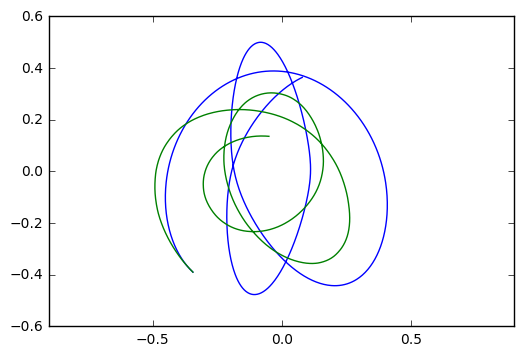

In [68]:
fer_el_plot(1.68129612,  0.20020785,  1.33923364,  0.00434235,  1.5       ,
          1.99934928)